# **Object Recognition Using MLP Classifier**

### **1. Importing Libraries and Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.datasets import cifar10

### **2. Data Preprocessing and Model Initialization**

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Flatten and normalize image data
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0

# Initialize MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128,),  # 1 hidden layer with 128 neurons
                    activation='relu',
                    solver='adam',
                    max_iter=20,
                    random_state=42,
                    verbose=True)

# Increase max_iter to 100 or more
mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(x_train_flat, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, random_state=42)

### **3. Model Prediction**

In [ ]:
# Predict on the test set
y_pred = mlp.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.4733


### **7. Detailed Classification Report**

In [ ]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.62      0.54      1000
           1       0.62      0.52      0.56      1000
           2       0.38      0.39      0.38      1000
           3       0.35      0.26      0.30      1000
           4       0.48      0.35      0.40      1000
           5       0.39      0.38      0.38      1000
           6       0.46      0.62      0.53      1000
           7       0.49      0.57      0.53      1000
           8       0.74      0.43      0.54      1000
           9       0.47      0.60      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



### **4. Visualizing Predictions vs. Actual Labels**

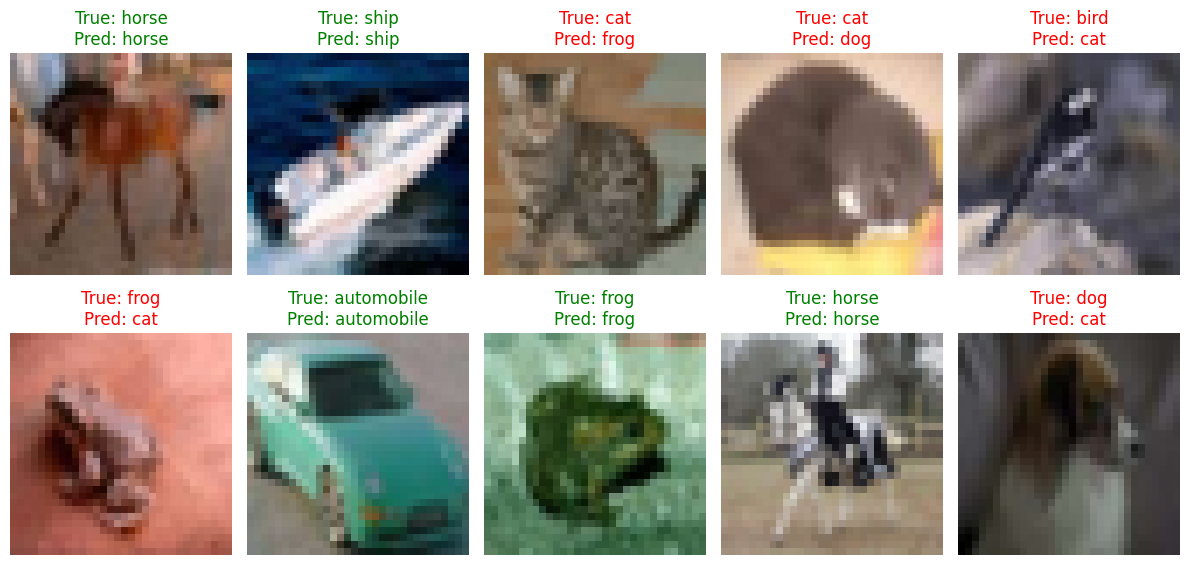

In [ ]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

import random

plt.figure(figsize=(12, 6))
for i in range(10):
    index = random.randint(0, len(x_test) - 1)
    img = x_test[index]
    true_label = y_test[index]
    predicted_label = y_pred[index]

    color = 'green' if predicted_label == true_label else 'red'

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}",
              color=color)

plt.tight_layout()
plt.show()


### **5. Confusion Matrix**

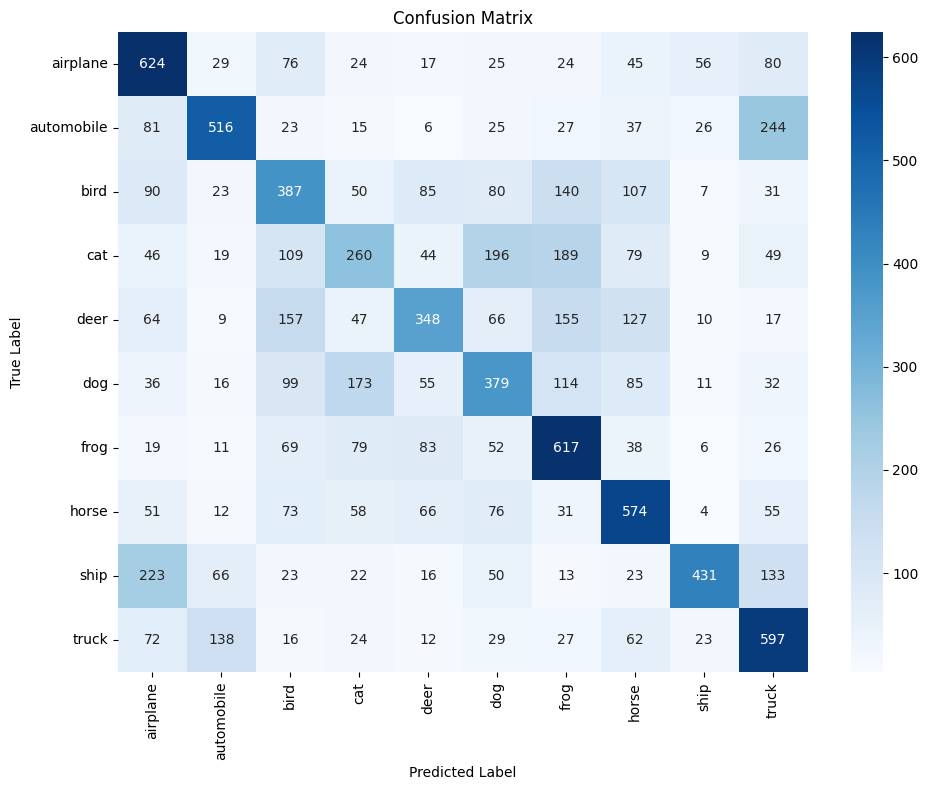

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


### **6. Class-wise Accuracy (Recall) Plot**

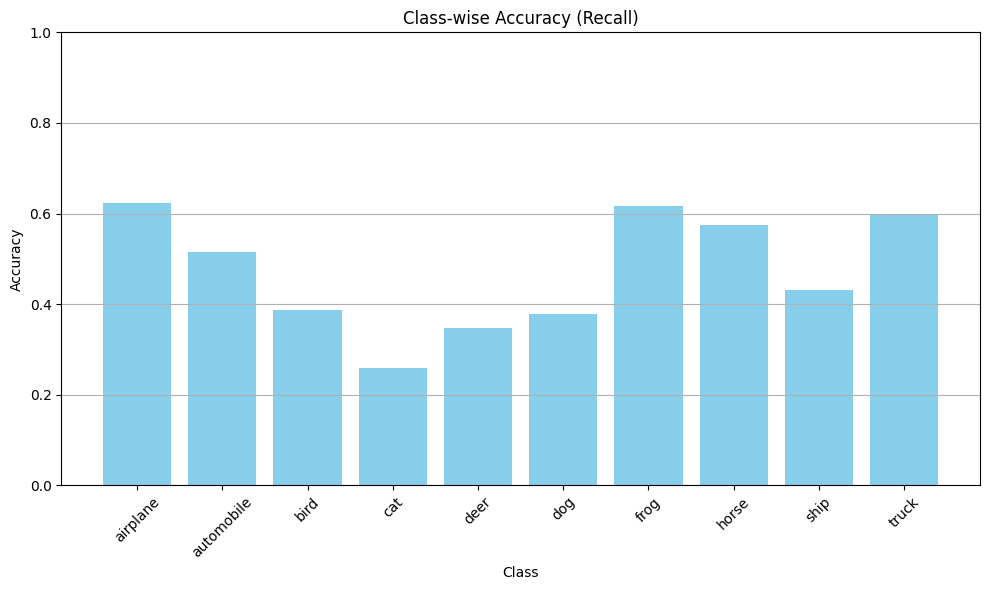

In [ ]:
from sklearn.metrics import classification_report

# Get precision, recall, f1-score per class
report = classification_report(y_test, y_pred, output_dict=True)

# Extract accuracies per class
accuracies = [report[str(i)]['recall'] for i in range(10)]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.title("Class-wise Accuracy (Recall)")
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
